In [1]:
import pandas as pd
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np

In [35]:
df = pd.read_csv('./data/playLibrary.csv')

In [36]:
df.head()

,play,shooter,goalie,shooterTeamScore,goalieTeamScore,shooterHomeAway,period,time,x,y,shotType
0,SHOT,8475268,8471239,0,0,away,1,00:29,48.0,-22.0,Snap Shot
1,SHOT,8478401,8476316,0,0,home,1,01:45,86.0,-6.0,Snap Shot
2,SHOT,8473618,8471239,0,0,away,1,04:11,66.0,11.0,Wrist Shot
3,SHOT,8478891,8471239,0,0,away,1,04:14,54.0,4.0,Wrist Shot
4,SHOT,8477425,8476316,0,0,home,1,06:31,52.0,36.0,Snap Shot


In [37]:
dfAnalysis = df.copy()

In [38]:
# One-hot encode goals/shots and set to a binary goal column
dfAnalysis['Goal'] = pd.get_dummies(df['play'])['GOAL']

In [39]:
# One-hot encode home/away and set to a binary home column
dfAnalysis['shooterHome'] = pd.get_dummies(df['shooterHomeAway'],drop_first=True)['home']

In [40]:
# One-hot encode shot type
dfAnalysis = dfAnalysis.join(pd.get_dummies(df['shotType'], drop_first=True))

In [50]:
# Format the time column so we can convert it to seconds
dfAnalysis['time'] = ['00:' + x for x in dfAnalysis['time']]
#pd.dt.total_seconds(dfAnalysis['time']) #.astype('timedelta64[s]').astype(int)

In [56]:
# Convert mm:ss time strings to total seconds
dfAnalysis['timeSeconds'] = pd.to_timedelta(dfAnalysis['time']).dt.total_seconds()

In [ ]:
# Calculate distance to net and angle on net

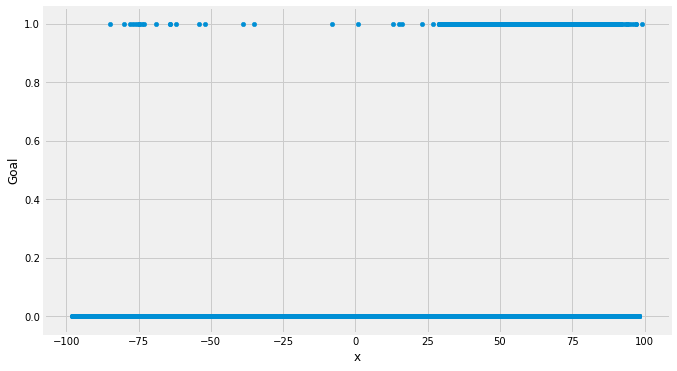

In [22]:
fig,ax = plt.subplots(figsize=(10,6))
df.plot.scatter(x='x',y='Goal',ax=ax)
plt.show()

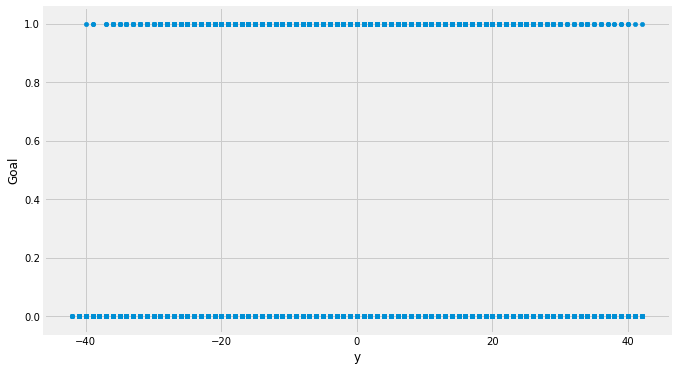

In [23]:
fig,ax = plt.subplots(figsize=(10,6))
df.plot.scatter(x='y',y='Goal',ax=ax)
plt.show()

In [59]:
dfAnalysis.head()

,play,shooter,goalie,shooterTeamScore,goalieTeamScore,shooterHomeAway,period,time,x,y,shotType,Goal,shooterHome,Deflected,Slap Shot,Snap Shot,Tip-In,Wrap-around,Wrist Shot,timeSeconds
0,SHOT,8475268,8471239,0,0,away,1,00:00:29,48.0,-22.0,Snap Shot,0,0,0,0,1,0,0,0,29.0
1,SHOT,8478401,8476316,0,0,home,1,00:01:45,86.0,-6.0,Snap Shot,0,1,0,0,1,0,0,0,105.0
2,SHOT,8473618,8471239,0,0,away,1,00:04:11,66.0,11.0,Wrist Shot,0,0,0,0,0,0,0,1,251.0
3,SHOT,8478891,8471239,0,0,away,1,00:04:14,54.0,4.0,Wrist Shot,0,0,0,0,0,0,0,1,254.0
4,SHOT,8477425,8476316,0,0,home,1,00:06:31,52.0,36.0,Snap Shot,0,1,0,0,1,0,0,0,391.0


In [63]:
dfGoals = dfAnalysis.loc[dfAnalysis['Goal'] == 1,:].copy()

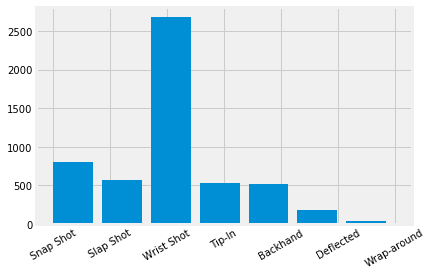

In [73]:
dfGoals['shotType'].hist(bins=7,width=0.7,xrot=30)

In [81]:
totalEachShot = dfAnalysis.groupby('shotType').count()['play']
goalsEachShot = dfGoals.groupby('shotType').count()['play']
successByShotType = goalsEachShot/totalEachShot

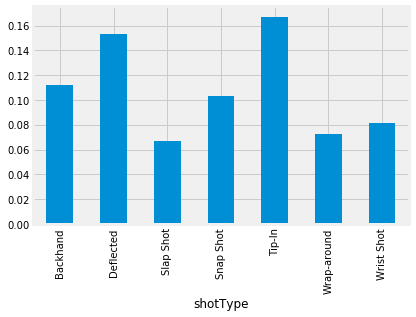

In [83]:
successByShotType.plot.bar()

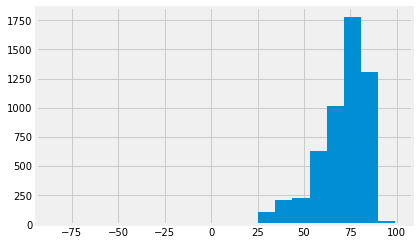

In [87]:
dfGoals['x'].hist(bins=20)

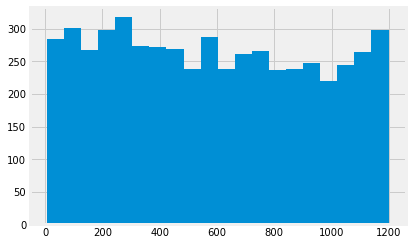

In [89]:
dfGoals['timeSeconds'].hist(bins=20)

In [90]:
pd.read_json('./data/goalies.json')

ValueError: If using all scalar values, you must pass an index

In [94]:
import json

file = open('./data/goalies.json')
openedFile = file.read()
goalieDict = json.loads(openedFile)

In [96]:
flippedJson = dict(zip(goalieDict.values(), goalieDict.keys()))

In [97]:
with open('./data/goalies.json', 'w') as fp:
    json.dump(flippedJson, fp)

In [98]:
goalieDF = df.loc[df['goalie'] == 8471239, :]

In [112]:
int('8471239')

8471239

In [109]:
json.loads(goalieDF.to_json(orient='records', date_format='iso'))

[{'play': 'SHOT',
  'shooter': 8475268,
  'goalie': 8471239,
  'shooterTeamScore': 0,
  'goalieTeamScore': 0,
  'shooterHomeAway': 'away',
  'period': 1,
  'time': '00:29',
  'x': 48.0,
  'y': -22.0,
  'shotType': 'Snap Shot'},
 {'play': 'SHOT',
  'shooter': 8473618,
  'goalie': 8471239,
  'shooterTeamScore': 0,
  'goalieTeamScore': 0,
  'shooterHomeAway': 'away',
  'period': 1,
  'time': '04:11',
  'x': 66.0,
  'y': 11.0,
  'shotType': 'Wrist Shot'},
 {'play': 'SHOT',
  'shooter': 8478891,
  'goalie': 8471239,
  'shooterTeamScore': 0,
  'goalieTeamScore': 0,
  'shooterHomeAway': 'away',
  'period': 1,
  'time': '04:14',
  'x': 54.0,
  'y': 4.0,
  'shotType': 'Wrist Shot'},
 {'play': 'SHOT',
  'shooter': 8478398,
  'goalie': 8471239,
  'shooterTeamScore': 0,
  'goalieTeamScore': 0,
  'shooterHomeAway': 'away',
  'period': 1,
  'time': '14:29',
  'x': 78.0,
  'y': 25.0,
  'shotType': 'Snap Shot'},
 {'play': 'SHOT',
  'shooter': 8479339,
  'goalie': 8471239,
  'shooterTeamScore': 0,
  'g

'[{"play":"SHOT","shooter":8475268,"goalie":8471239,"shooterTeamScore":0,"goalieTeamScore":0,"shooterHomeAway":"away","period":1,"time":"00:29","x":48.0,"y":-22.0,"shotType":"Snap Shot"},{"play":"SHOT","shooter":8473618,"goalie":8471239,"shooterTeamScore":0,"goalieTeamScore":0,"shooterHomeAway":"away","period":1,"time":"04:11","x":66.0,"y":11.0,"shotType":"Wrist Shot"},{"play":"SHOT","shooter":8478891,"goalie":8471239,"shooterTeamScore":0,"goalieTeamScore":0,"shooterHomeAway":"away","period":1,"time":"04:14","x":54.0,"y":4.0,"shotType":"Wrist Shot"},{"play":"SHOT","shooter":8478398,"goalie":8471239,"shooterTeamScore":0,"goalieTeamScore":0,"shooterHomeAway":"away","period":1,"time":"14:29","x":78.0,"y":25.0,"shotType":"Snap Shot"},{"play":"SHOT","shooter":8479339,"goalie":8471239,"shooterTeamScore":0,"goalieTeamScore":2,"shooterHomeAway":"away","period":2,"time":"05:36","x":49.0,"y":22.0,"shotType":"Slap Shot"},{"play":"SHOT","shooter":8478891,"goalie":8471239,"shooterTeamScore":0,"goal